In [2]:
import sys
import os
import scipy
import gzip
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### phylogeny MRS 1D

In [3]:
answer_f = open('/data/project/Alzheimer/YSscript/EM_MRS/data/npvaf/Moore_1D/pancreas_duct/PD43850-D7_input/npvaf.txt','r')

input_dir = '/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/Moore_1D/pancreas_duct/PD43850-D7_input'

clement_f = open(input_dir + '/CLEMENT_soft_1st.membership.txt','r')
clement_list = []
for fline in clement_f:
    membership = str(fline.rstrip())

    clement_list.append(membership)
clement_f.close()
print(len(clement_list))

pyclone_f = open(input_dir + '/pyclonevi.membership.txt','r')
pyclone_list = []
for fline in pyclone_f:
    membership = str(fline.rstrip())
    pyclone_list.append(membership)
pyclone_f.close()
print(len(pyclone_list))

sciclone_f = open(input_dir + '/sciclone.membership.txt','r')
sciclone_list = []
for fline in sciclone_f:
    membership = str(fline.rstrip())
    sciclone_list.append(membership)
sciclone_f.close()
print(len(sciclone_list))

quantum_f = open(input_dir + '/quantumclone.membership.txt','r')
quantum_list = []
for fline in quantum_f:
    membership = str(fline.rstrip())
    quantum_list.append(membership)
quantum_f.close()
print(len(quantum_list))


answer_df = pd.DataFrame(columns=['ID','block1','CLUSTER'])
clement_df =  pd.DataFrame(columns=['ID','block1','CLUSTER'])
pyclone_df = pd.DataFrame(columns=['ID','block1','CLUSTER'])
sciclone_df = pd.DataFrame(columns=['ID','block1','CLUSTER'])
quantum_df =  pd.DataFrame(columns=['ID','block1','CLUSTER'])

idx = 0
for fline in answer_f:
    ftab = fline.rstrip().split('\t')
    if ftab[0] == '':
        continue
    ID = ftab[0]

    block1_vaf = float(ftab[1])
    
    membership = ftab[2]
    
    answer_df.loc[idx] = ID, block1_vaf, membership
    
    clement_df.loc[idx] = ID, block1_vaf, clement_list[idx]
    pyclone_df.loc[idx] = ID, block1_vaf, pyclone_list[idx]
    sciclone_df.loc[idx] = ID, block1_vaf, sciclone_list[idx]
    quantum_df.loc[idx] = ID, block1_vaf, quantum_list[idx]
    idx += 1
answer_f.close()

300
300
300
300


In [4]:
answer_df

,ID,block1,CLUSTER
0,chr1_4766958,0.15,pancreas_duct
1,chr1_23609372,0.17,pancreas_duct
2,chr1_47262167,0.15,pancreas_duct
3,chr1_50845698,0.14,pancreas_duct
4,chr1_61843636,0.16,pancreas_duct
...,...,...,...
295,chrX_141483223,0.18,pancreas_duct
296,chrX_141840558,0.17,pancreas_duct
297,chrX_142271989,0.19,pancreas_duct
298,chrX_146462072,0.16,pancreas_duct


In [5]:
day = '230428'
output_dir = '/data/project/Alzheimer/EM_cluster/00.RESULT/'+day+'/03.bioData/example'
os.makedirs(output_dir, exist_ok=True)

In [7]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning

# fig = plt.figure(figsize = (15,15))
# ax = fig.add_subplot()
# plt.tick_params(axis = 'x', labelsize = 15)
# ax.set_xlabel('Mixture (=VAF*2)', fontsize = 20)
# ax.set_title('Answer', fontsize=30)
# sc = ax.set_xlim(0, 0.6); ax.set_ylim(0, 10)

# for group_name, group_idx in answer_df.groupby('CLUSTER').groups.items():
#     y = answer_df.iloc[group_idx,2] # group
#     x = answer_df.iloc[group_idx,1] # VAF by group

#     if group_name == 'S0':
#         sns.kdeplot(x, label=group_name, color='firebrick', shade = True)
#     elif group_name == 'V1':
#         sns.kdeplot(x, label=group_name,color='darkorange', shade = True) 
#     elif group_name == 'V3':
#         sns.kdeplot(x, label=group_name,color='forestgreen', shade = True)
#     elif group_name == 'V4':
#         sns.kdeplot(x, label=group_name,color='royalblue', shade = True)
#     elif group_name == '4':
#         sns.kdeplot(x, label=group_name,color='mediumorchid', shade = True)
#     elif group_name == 'FP':
#         sns.kdeplot(x, label=group_name,color='black', shade = True)
        
# ax.legend(loc = 'upper right', fontsize = 20)        
# ax.figure.savefig('/data/project/Alzheimer/EM_cluster/00.RESULT/01.cellData/1D_Answer.pdf')

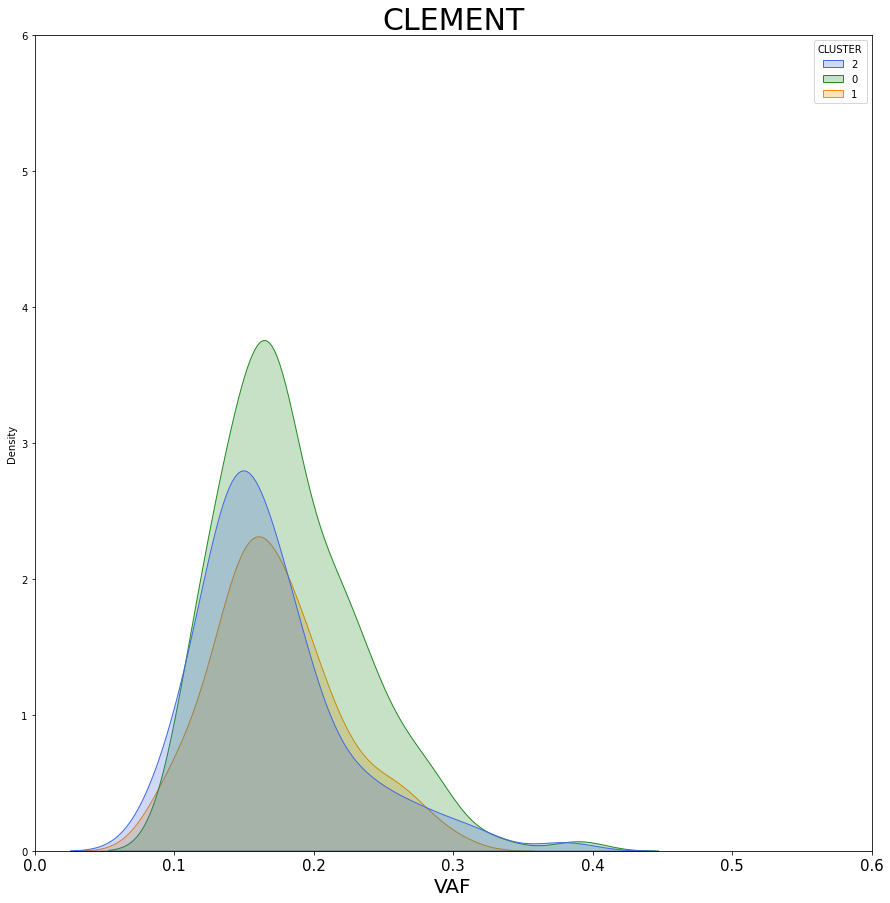

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot()
plt.tick_params(axis = 'x', labelsize = 15)
ax.set_xlabel('VAF', fontsize = 20)
ax.set_title('CLEMENT', fontsize=30)
sc = ax.set_xlim(0, 0.6); ax.set_ylim(0, 6)

color_dict = {'3': 'firebrick', '1': 'darkorange', '0': 'forestgreen', '2': 'royalblue'}

sns.kdeplot(data=clement_df, x="block1", hue="CLUSTER", palette=color_dict, shade =True)

ax.figure.savefig(output_dir + '/1D_CLEMENT.pdf')

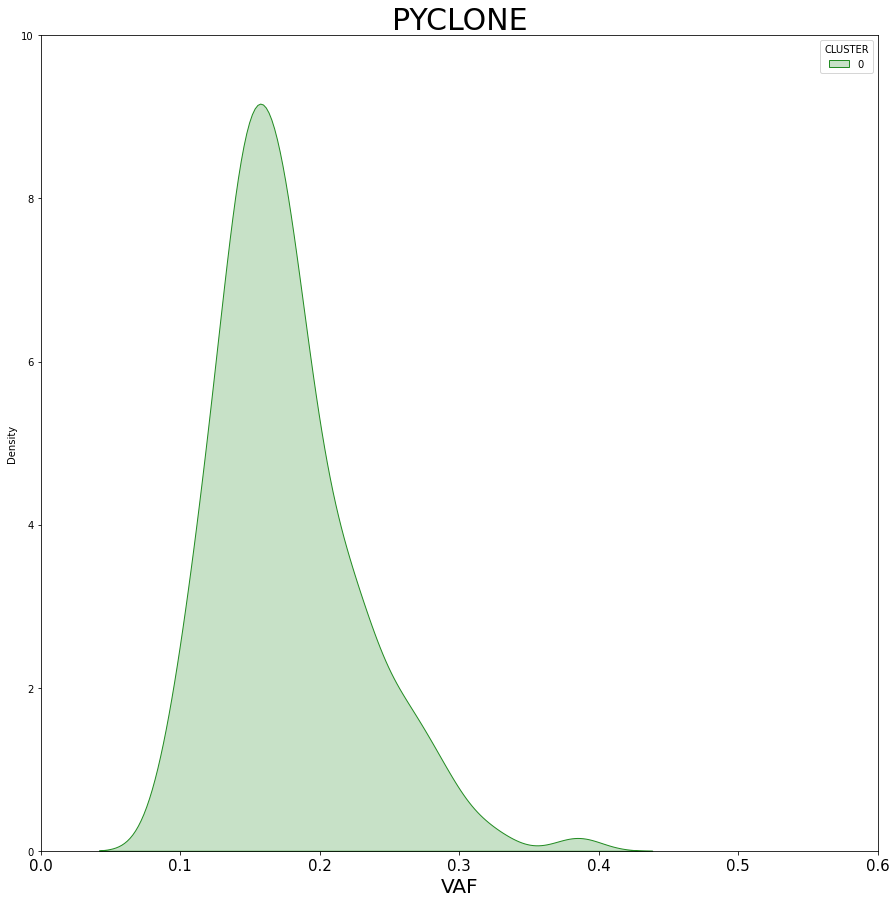

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot()
plt.tick_params(axis = 'x', labelsize = 15)
ax.set_xlabel('VAF', fontsize = 20)
ax.set_title('PYCLONE', fontsize=30)
sc = ax.set_xlim(0, 0.6); ax.set_ylim(0, 10)

color_dict = {'3': 'firebrick', '1': 'darkorange', '0': 'forestgreen', '2': 'royalblue'}

sns.kdeplot(data=pyclone_df, x="block1", hue="CLUSTER", palette=color_dict, shade =True)

ax.figure.savefig(output_dir + '/1D_PYCLONE.pdf')

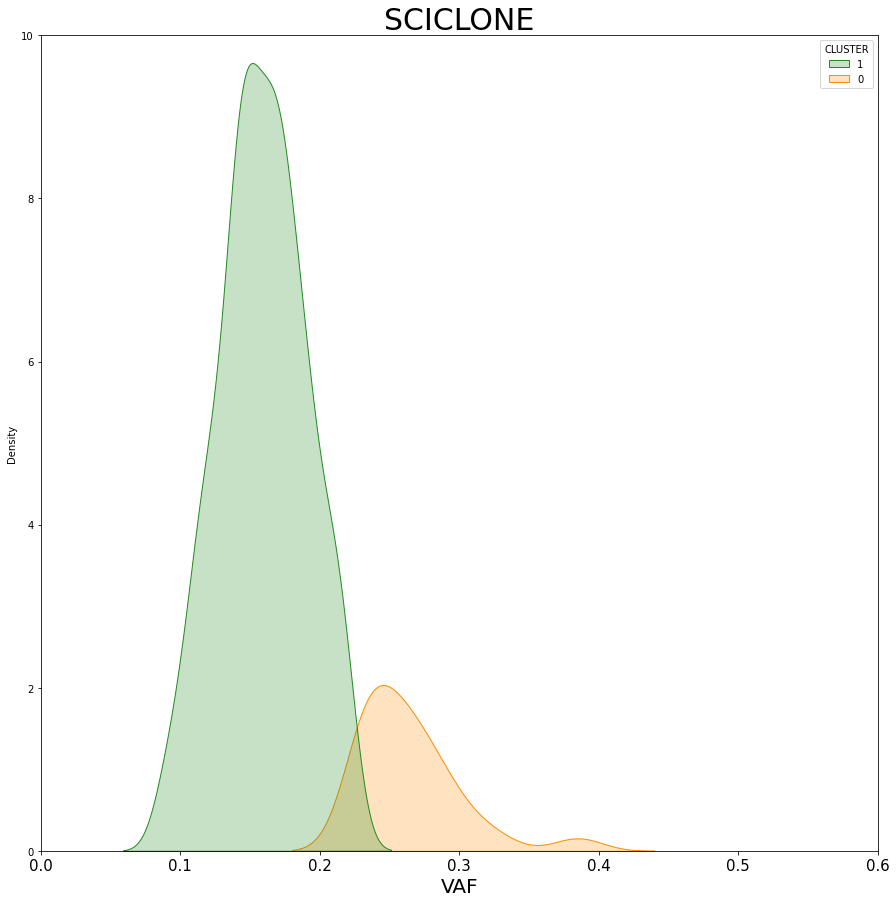

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot()
plt.tick_params(axis = 'x', labelsize = 15)
ax.set_xlabel('VAF', fontsize = 20)
ax.set_title('SCICLONE', fontsize=30)
sc = ax.set_xlim(0, 0.6); ax.set_ylim(0, 10)

color_dict = {'3': 'firebrick', '0': 'darkorange', '1': 'forestgreen', '2': 'royalblue'}

sns.kdeplot(data=sciclone_df, x="block1", hue="CLUSTER", palette=color_dict, shade =True)

ax.figure.savefig(output_dir + '/1D_SCICLONE.pdf')

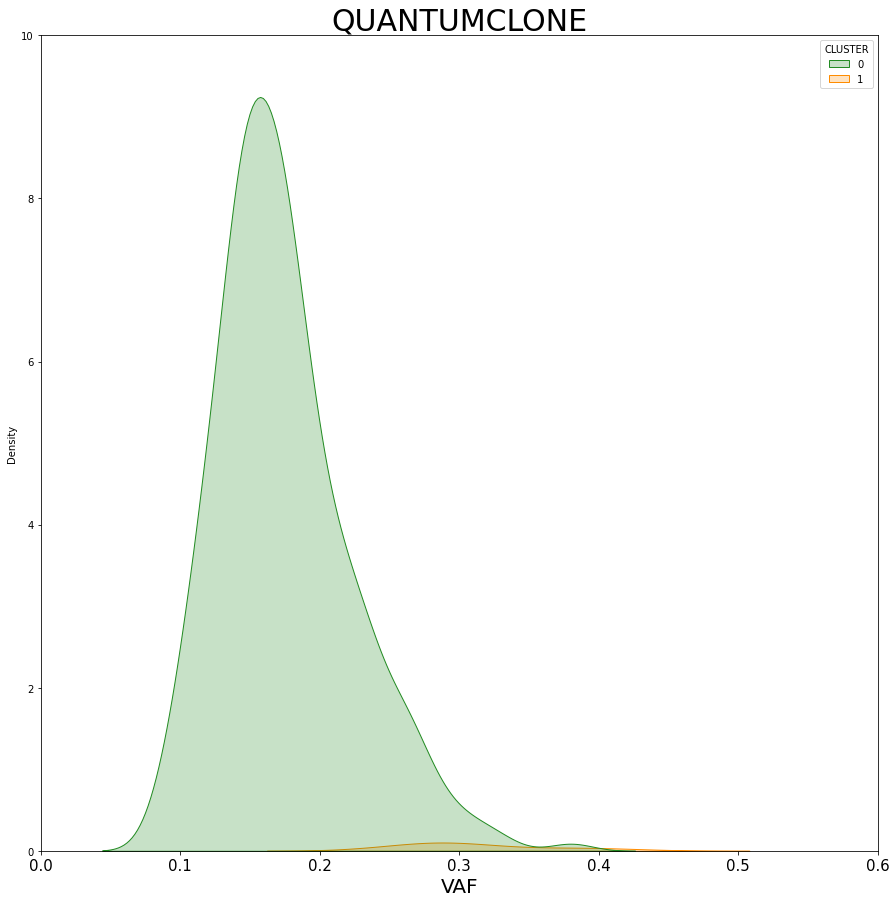

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot()
plt.tick_params(axis = 'x', labelsize = 15)
ax.set_xlabel('VAF', fontsize = 20)
ax.set_title('QUANTUMCLONE', fontsize=30)
sc = ax.set_xlim(0, 0.6); ax.set_ylim(0, 10)

color_dict = {'3': 'firebrick', '1': 'darkorange', '0': 'forestgreen', '2': 'royalblue'}

sns.kdeplot(data=quantum_df, x="block1", hue="CLUSTER", palette=color_dict, shade =True)

ax.figure.savefig(output_dir + '/1D_QUANTUM.pdf')